<a href="https://colab.research.google.com/github/anamaria2204/AI_Homework/blob/main/Lab7_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creare baza de date



In [122]:
from google.colab import drive

# Montează Drive-ul
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
import itertools
import pandas as pd
import numpy as np
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from google.colab import drive

In [124]:
def apply_sepia_filter(image):
    try:
        width, height = image.size
        pixels = image.load()
        for py in range(height):
            for px in range(width):
                r, g, b = image.getpixel((px, py))
                tr = int(0.393 * r + 0.769 * g + 0.189 * b)
                tg = int(0.349 * r + 0.686 * g + 0.168 * b)
                tb = int(0.272 * r + 0.534 * g + 0.131 * b)
                tr = min(255, tr)
                tg = min(255, tg)
                tb = min(255, tb)
                pixels[px, py] = (tr, tg, tb)
        return image
    except Exception as e:
        print(f"Error applying sepia filter: {e}")
        return None

In [125]:
def generate_images(image_dir, image_base):
    os.makedirs(image_base, exist_ok=True)

    images = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg'))]
    random.shuffle(images)
    sepia_indices = np.random.choice(len(images), len(images) // 2, replace=False)
    data_for_csv = []

    for index, filename in enumerate(images):
        file_path = os.path.join(image_dir, filename)
        try:
            image = Image.open(file_path)

            is_sepia = 0
            output_filename = f"not_sepia_{filename}"

            if index in sepia_indices:
                filtered_image = apply_sepia_filter(image)
                if filtered_image is not None:
                    output_filename = f"sepia_{filename}"
                    output_path = os.path.join(image_base, output_filename)
                    filtered_image.save(output_path)
                    is_sepia = 1
                else:
                    output_path = os.path.join(image_base, output_filename)
                    image.save(output_path)
            else:
                output_path = os.path.join(image_base, output_filename)
                image.save(output_path)

            data_for_csv.append([output_path, is_sepia])
            print(f"Processed: {output_filename} (Sepia: {is_sepia})")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

    df = pd.DataFrame(data_for_csv, columns=['file_path', 'is_sepia'])
    csv_path = os.path.join(image_base, 'image_labels3.csv')
    df.to_csv(csv_path, index=False)
    print(f"\nData saved to {csv_path}")
    print(df.head())

source_dir = '/content/drive/MyDrive/JellyFish'
output_dir = '/content/drive/MyDrive/imagini3'

generate_images(source_dir, output_dir)

Processed: sepia_JellyFish (351).jpg (Sepia: 1)
Processed: not_sepia_JellyFish (314).jpg (Sepia: 0)
Processed: sepia_6290774083_07778af4f5_o.jpg (Sepia: 1)
Processed: not_sepia_5616977734_5ca9b2b9b6_b.jpg (Sepia: 0)
Processed: sepia_JellyFish (304).jpg (Sepia: 1)
Processed: not_sepia_4968421767_b646c783cc_o.jpg (Sepia: 0)
Processed: not_sepia_JellyFish (320).jpg (Sepia: 0)
Processed: sepia_JellyFish (5).jpg (Sepia: 1)
Processed: sepia_6051740643_2a0551338e_o.jpg (Sepia: 1)
Processed: not_sepia_JellyFish (81).jpg (Sepia: 0)
Processed: not_sepia_JellyFish (95).jpg (Sepia: 0)
Processed: not_sepia_JellyFish (308).jpg (Sepia: 0)
Processed: not_sepia_JellyFish (86).jpg (Sepia: 0)
Processed: not_sepia_JellyFish (89).jpg (Sepia: 0)
Processed: not_sepia_JellyFish (67).jpg (Sepia: 0)
Processed: not_sepia_JellyFish (302).jpg (Sepia: 0)
Processed: not_sepia_JellyFish (299).jpg (Sepia: 0)
Processed: sepia_JellyFish (305).jpg (Sepia: 1)
Processed: sepia_5597956465_97f4d2ddfe_b.jpg (Sepia: 1)
Process

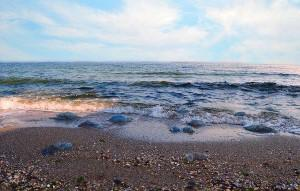

Sepia: 0



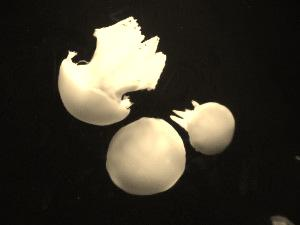

Sepia: 1



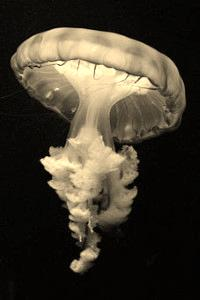

Sepia: 1



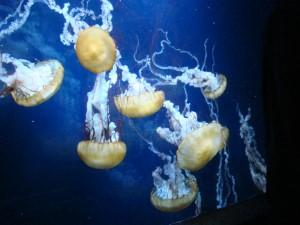

Sepia: 0



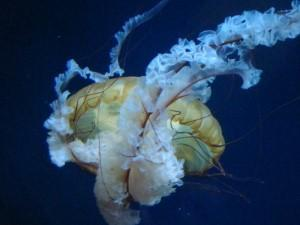

Sepia: 0



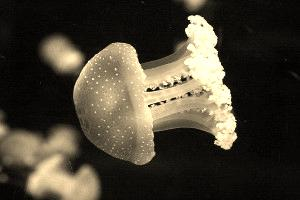

Sepia: 1



In [146]:
from IPython.display import Image as IPImage, display

sample_df = pd.read_csv(os.path.join(output_dir, 'image_labels3.csv')).sample(6)
for _, row in sample_df.iterrows():
    display(IPImage(filename=row['file_path']))
    print(f"Sepia: {row['is_sepia']}\n")

# Folosire ANN (tool) pentru a detecta pozele cu sepia si fara


In [127]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [128]:
def load_and_preprocess_data(csv_path, img_size=(64,64)):
    df = pd.read_csv(csv_path)
    images = []
    labels = []

    for idx, row in df.iterrows():
        img = Image.open(row['file_path']).resize(img_size).convert('L')
        images.append(np.array(img)/255.0)
        labels.append(row['is_sepia'])

    return np.array(images), np.array(labels)

X, y = load_and_preprocess_data('/content/drive/MyDrive/imagini3/image_labels3.csv')
X = X.reshape(-1, 64*64)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(64*64,)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [130]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.4833 - loss: 0.9967 - val_accuracy: 0.7188 - val_loss: 0.6628
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4990 - loss: 0.7127 - val_accuracy: 0.5938 - val_loss: 0.6756
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5813 - loss: 0.6539 - val_accuracy: 0.5938 - val_loss: 0.6614
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5448 - loss: 0.6700 - val_accuracy: 0.5938 - val_loss: 0.6611
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6177 - loss: 0.6293 - val_accuracy: 0.5000 - val_loss: 0.6646
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7010 - loss: 0.5861 - val_accuracy: 0.4688 - val_loss: 0.7359
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6771 - loss: 0.5889 - val_accuracy: 0.5312 - val_loss: 0.6777
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7490 - loss: 0.5504 - val_accuracy: 0.5625 - val_loss: 0.6837


In [106]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nAcuratețe pe datele de test: {accuracy*100:.2f}%")

from sklearn.metrics import confusion_matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4354 - loss: 1.7300

Acuratețe pe datele de test: 45.00%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


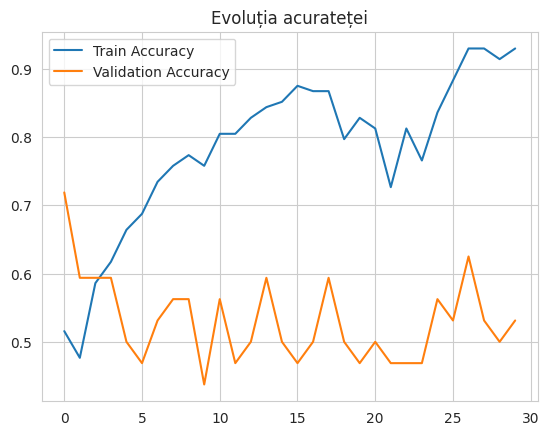

In [131]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Evoluția acurateței')
plt.legend()
plt.show()

# Influenta (hyper)parametriilor


In [132]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [133]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np

def build_model(params):
    model = Sequential()
    model.add(Dense(params['architecture']['units'], input_shape=(4096,), activation=params['activation']))

    reg = params['regularization']

    for _ in range(params['architecture']['hidden_layers']):
        layer_config = {
            'units': params['architecture']['units'],
            'activation': params['activation']
        }

        if reg['type'] == 'l2':
            layer_config['kernel_regularizer'] = l2(reg['value'])

        model.add(Dense(**layer_config))

        if reg['type'] == 'dropout':
            model.add(Dropout(reg['value']))

    model.add(Dense(2, activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=params.get('learning_rate', 0.001)),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

def train_and_evaluate(configs, X_train, y_train, X_test, y_test):
    results = []

    for config in configs:
        print(f"\n{'='*50}\nTestăm configurația: {config}\n{'='*50}")

        model = build_model({
            'architecture': config['architecture'],
            'activation': config['activation'],
            'regularization': config['regularization'],
            'learning_rate': config['learning_rate']
        })

        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=50,
            batch_size=config['batch_size'],
            callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
            verbose=1
        )

        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

        results.append({
            **config,
            'test_accuracy': test_acc,
            'test_loss': test_loss,
            'best_val_accuracy': max(history.history['val_accuracy']),
            'epochs': len(history.history['loss']),
            'history': history.history
        })

        print(f"Acuratețe pe validare: {results[-1]['best_val_accuracy']:.4f}")
        print(f"Acuratețe pe test: {test_acc:.4f}")

    return results

hyperparam_configs = [
    {
        'architecture': {'hidden_layers': 1, 'units': 64},
        'activation': 'relu',
        'regularization': {'type': 'l2', 'value': 0.01},
        'learning_rate': 0.001,
        'batch_size': 32
    },
    {
        'architecture': {'hidden_layers': 2, 'units': 128},
        'activation': 'tanh',
        'regularization': {'type': 'dropout', 'value': 0.3},
        'learning_rate': 0.0001,
        'batch_size': 64
    }
]
results = train_and_evaluate(hyperparam_configs, X_train, y_train, X_test, y_test)

for i, res in enumerate(results):
    print(f"\nConfig {i+1}:")
    print(f"Acuratețe test: {res['test_accuracy']:.4f}")
    print(f"Parametri: {res}")


Testăm configurația: {'architecture': {'hidden_layers': 1, 'units': 64}, 'activation': 'relu', 'regularization': {'type': 'l2', 'value': 0.01}, 'learning_rate': 0.001, 'batch_size': 32}
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.4429 - loss: 1.4443 - val_accuracy: 0.4750 - val_loss: 1.2909
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5457 - loss: 1.3100 - val_accuracy: 0.4500 - val_loss: 1.4403
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5806 - loss: 1.2524 - val_accuracy: 0.4750 - val_loss: 1.2525
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5871 - loss: 1.2311 - val_accuracy: 0.4000 - val_loss: 1.3069
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6230 - loss: 1.1943 - val_accuracy: 0.5000 - val_loss: 1.1780
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6030 - loss: 1.1440 - val_accuracy: 0.3750 - val_loss: 1.2800
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.

# ANN cod propriu

In [150]:
import pandas as pd
import numpy as np
from PIL import Image
import os

csv_path = "/content/drive/MyDrive/imagini3/image_labels3.csv"
image_size = (64, 64)

df = pd.read_csv(csv_path)

X = []
y = []

for idx, row in df.iterrows():
    path = row['file_path']
    label = row['is_sepia']

    try:
        img = Image.open(path).convert('RGB')
        img = img.resize(image_size)
        img_array = np.array(img) / 255.0
        X.append(img_array.flatten())
        y.append(label)
    except Exception as e:
        print(f"Imaginea nu a putut fi procesată: {path} ({e})")

X = np.array(X)
y = np.array(y).reshape(-1, 1)

print(f"Formă X: {X.shape}, Formă y: {y.shape}")

Formă X: (200, 12288), Formă y: (200, 1)


In [151]:
output_path = "/content/drive/MyDrive/ann_dataset/dataset_sepia_64x64.npz"
np.savez(output_path, X=X, y=y)

print(f"Fișier salvat la: {output_path}")


Fișier salvat la: /content/drive/MyDrive/ann_dataset/dataset_sepia_64x64.npz


In [152]:
import random

data = list(zip(X, y))
random.shuffle(data)

X_shuffled, y_shuffled = zip(*data)

train_size = int(0.8 * len(X_shuffled))
X_train_raw = list(X_shuffled[:train_size])
y_train = list(y_shuffled[:train_size])
X_test_raw = list(X_shuffled[train_size:])
y_test = list(y_shuffled[train_size:])

X_train = [[x_i / 255.0 for x_i in x] for x in X_train_raw]
X_test = [[x_i / 255.0 for x_i in x] for x in X_test_raw]

print(f"Formă X_train: {len(X_train)}, Formă y_train: {len(y_train)}")
print(f"Formă X_test: {len(X_test)}, Formă y_test: {len(y_test)}")


Formă X_train: 160, Formă y_train: 160
Formă X_test: 40, Formă y_test: 40


In [153]:
import random
import math

In [154]:
import random
import math

class MyAnn:
    def __init__(self, input_size, hidden_size=5):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = 1

        self.w1 = [[random.uniform(-1, 1) for _ in range(hidden_size)] for _ in range(input_size)]
        self.b1 = [0.0 for _ in range(hidden_size)]

        self.w2 = [[random.uniform(-1, 1)] for _ in range(hidden_size)]
        self.b2 = [0.0]

    def sigmoid(self, x):
        return 1 / (1 + math.exp(-x))

    def sigmoid_deriv(self, sigmoid_x):
        return sigmoid_x * (1 - sigmoid_x)

    def dot(self, vect1, vect2):
        return sum(x * y for x, y in zip(vect1, vect2))

    def forward(self, x):
        z1 = []
        for j in range(self.hidden_size):
            weighted_sum = self.dot(x, [self.w1[i][j] for i in range(self.input_size)]) + self.b1[j]
            z1.append(self.sigmoid(weighted_sum))

        output_input = self.dot(z1, [self.w2[j][0] for j in range(self.hidden_size)]) + self.b2[0]
        output = self.sigmoid(output_input)
        return z1, output

    def fit(self, X, y, epochs=10, lr=0.1):
        for epoch in range(epochs):
            loss_total = 0

            for xi, target in zip(X, y):
                target = float(target)
                z1, output = self.forward(xi)

                error = output - target
                loss_total += error ** 2

                d_output = error * self.sigmoid_deriv(output)

                for j in range(self.hidden_size):
                    self.w2[j][0] -= lr * d_output * z1[j]
                self.b2[0] -= lr * d_output

                for j in range(self.hidden_size):
                    d_hidden = d_output * self.w2[j][0] * self.sigmoid_deriv(z1[j])
                    for i in range(self.input_size):
                        self.w1[i][j] -= lr * d_hidden * xi[i]
                    self.b1[j] -= lr * d_hidden

            print(f"Epoch {epoch + 1} - Loss: {loss_total:.4f}")

    def predict(self, x):
        _, output = self.forward(x)
        return 1 if output > 0.5 else 0

    def accuracy(self, X, y):
        correct = 0
        for xi, yi in zip(X, y):
            prediction = self.predict(xi)
            if prediction == yi:
                correct += 1
        return correct / len(y)


In [144]:
input_size = len(X_train[0])
model = MyAnn(input_size=input_size)

model.fit(X_train, y_train, epochs=32, lr=0.1)

acc = model.accuracy(X_test, y_test)
print(f"Acuratețea pe setul de test: {acc * 100:.2f}%")

<ipython-input-141-2f57592a6467>:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  target = float(target)


Epoch 1 - Loss: 39.8018
Epoch 2 - Loss: 39.8850
Epoch 3 - Loss: 39.9653
Epoch 4 - Loss: 39.9609
Epoch 5 - Loss: 39.9465
Epoch 6 - Loss: 39.9307
Epoch 7 - Loss: 39.9144
Epoch 8 - Loss: 39.8975
Epoch 9 - Loss: 39.8802
Epoch 10 - Loss: 39.8624
Epoch 11 - Loss: 39.8441
Epoch 12 - Loss: 39.8252
Epoch 13 - Loss: 39.8058
Epoch 14 - Loss: 39.7858
Epoch 15 - Loss: 39.7652
Epoch 16 - Loss: 39.7440
Epoch 17 - Loss: 39.7222
Epoch 18 - Loss: 39.6998
Epoch 19 - Loss: 39.6767
Epoch 20 - Loss: 39.6529
Epoch 21 - Loss: 39.6284
Epoch 22 - Loss: 39.6032
Epoch 23 - Loss: 39.5772
Epoch 24 - Loss: 39.5505
Epoch 25 - Loss: 39.5229
Epoch 26 - Loss: 39.4946
Epoch 27 - Loss: 39.4654
Epoch 28 - Loss: 39.4354
Epoch 29 - Loss: 39.4045
Epoch 30 - Loss: 39.3726
Epoch 31 - Loss: 39.3399
Epoch 32 - Loss: 39.3061
Acuratețea pe setul de test: 45.00%


# CNN cod propriu


In [155]:
import pandas as pd
import numpy as np
from PIL import Image
import os
from tensorflow.keras.utils import to_categorical

csv_path = "/content/drive/MyDrive/imagini3/image_labels3.csv"
image_size = (64, 64)

output_dir = "/content/drive/MyDrive/cnn_dataset"
os.makedirs(output_dir, exist_ok=True)

df = pd.read_csv(csv_path)

X = []
y = []

for idx, row in df.iterrows():
    path = row['file_path']
    label = int(row['is_sepia'])

    try:
        img = Image.open(path).convert('RGB')
        img = img.resize(image_size)

        label_folder = os.path.join(output_dir, str(label))
        os.makedirs(label_folder, exist_ok=True)

        filename = f"img_{idx}.png"
        img.save(os.path.join(label_folder, filename))

        img_array = np.array(img) / 255.0
        X.append(img_array)
        y.append(label)

    except Exception as e:
        print(f"Imaginea nu a putut fi procesată: {path} ({e})")

X = np.array(X)
y = to_categorical(np.array(y))  # one-hot encoding

print(f"Formă X: {X.shape}, Formă y: {y.shape}")
print(f"Imaginile au fost salvate în: {output_dir}")


Formă X: (200, 64, 64, 3), Formă y: (200, 2)
Imaginile au fost salvate în: /content/drive/MyDrive/cnn_dataset


In [160]:
import random
import numpy as np

data = list(zip(X, y))
random.shuffle(data)
X_shuffled, y_shuffled = zip(*data)

train_size = int(0.8 * len(X_shuffled))
X_train = np.array(X_shuffled[:train_size])
y_train = np.array(y_shuffled[:train_size])
X_test = np.array(X_shuffled[train_size:])
y_test = np.array(y_shuffled[train_size:])

print(f"Formă X_train: {X_train.shape}, Formă y_train: {y_train.shape}")
print(f"Formă X_test: {X_test.shape}, Formă y_test: {y_test.shape}")


Formă X_train: (160, 64, 64, 3), Formă y_train: (160, 2)
Formă X_test: (40, 64, 64, 3), Formă y_test: (40, 2)
